In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
file_path = "/content/dermatology_database_1.csv"
data = pd.read_csv(file_path)

In [24]:
data = data.replace('?', np.nan)

# Convert all columns to numeric, coerce errors to NaN
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Impute missing values (NaN) with the mean of each column
data = data.fillna(data.mean())
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


In [25]:
X = data.drop(columns=['class'])  # Replace 'target' with the actual target column name which is likely 'class'
y = data['class']
X
y          # Replace 'target' with the actual target column name which is likely 'class'

,class
0,2
1,1
2,3
3,1
4,3
...,...
361,4
362,4
363,3
364,3


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Q1. From the above data split the data into train and test and train SVM, RF find the result?**

In [34]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print("SVM Results:")
print(classification_report(y_test, svm_preds))

SVM Results:
              precision    recall  f1-score   support

           1       0.94      0.97      0.95        31
           2       0.35      1.00      0.51         9
           3       1.00      1.00      1.00        13
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        10
           6       0.67      0.67      0.67         3

    accuracy                           0.73        74
   macro avg       0.49      0.61      0.52        74
weighted avg       0.64      0.73      0.66        74



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("RF Results:")
print(classification_report(y_test, rf_preds))

RF Results:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



# **Q2. Find the outliers, remove the outliers and again train SVM, RF find the results.**

In [41]:
# Detect and remove outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

columns_to_check = X.columns
clean_data = remove_outliers(data, columns_to_check)
clean_data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22.0,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30.0,4
43,2,1,1,0,0,0,0,0,1,0,...,0,0,2,0,0,0,2,0,35.0,2
64,2,2,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,2,0,36.0,2
70,2,2,2,1,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,34.0,2
74,2,1,2,2,1,0,0,0,0,0,...,0,0,2,0,0,0,1,0,17.0,4
76,2,2,2,1,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,33.0,2
82,2,1,1,2,0,0,0,0,0,0,...,0,0,3,0,0,0,3,0,27.0,2
96,2,2,1,2,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,35.0,2


In [37]:
# Re-split and train models on clean data
X_clean = clean_data.drop(columns=['class'])  # Change 'target' to 'class'
y_clean = clean_data['class']              # Change 'target' to 'class'
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [38]:
# Re-train SVM
svm_model.fit(X_train_clean, y_train_clean)
svm_preds_clean = svm_model.predict(X_test_clean)
print("SVM Results after outlier removal:")
print(classification_report(y_test_clean, svm_preds_clean))


SVM Results after outlier removal:
              precision    recall  f1-score   support

           2       0.67      1.00      0.80         4
           4       1.00      0.50      0.67         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8



In [39]:
# Re-train RF
rf_model.fit(X_train_clean, y_train_clean)
rf_preds_clean = rf_model.predict(X_test_clean)
print("RF Results after outlier removal:")
print(classification_report(y_test_clean, rf_preds_clean))


RF Results after outlier removal:
              precision    recall  f1-score   support

           2       0.80      1.00      0.89         4
           4       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



# **Q3 Plot histograms for each column of above data.**

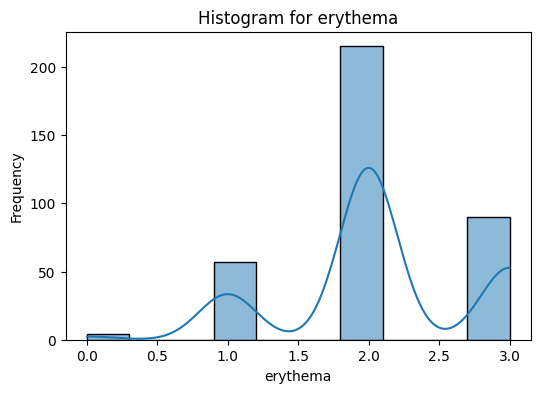

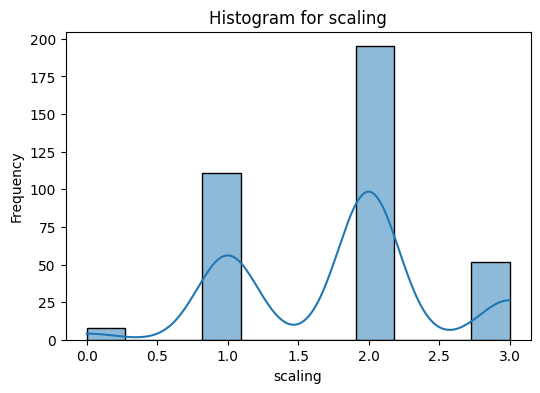

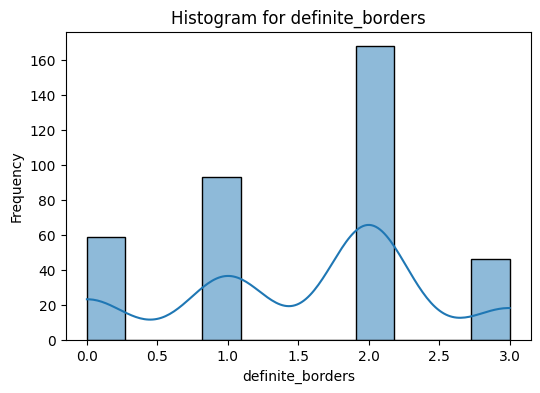

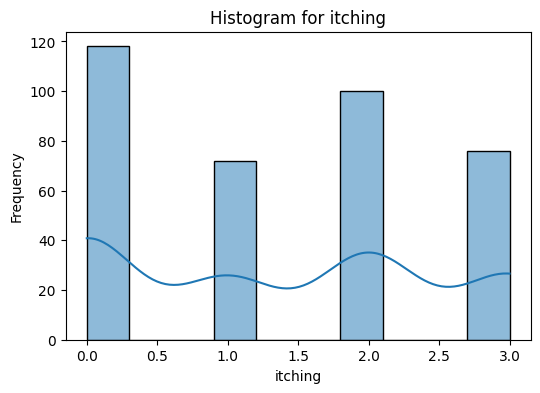

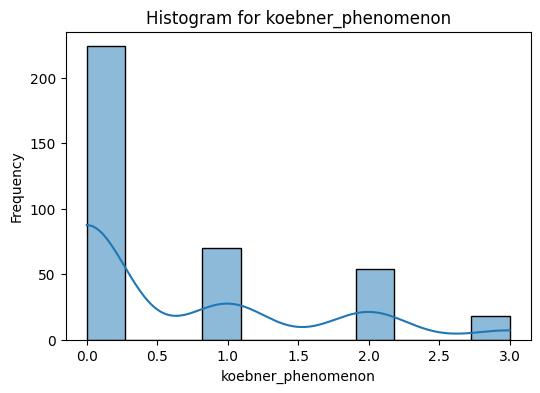

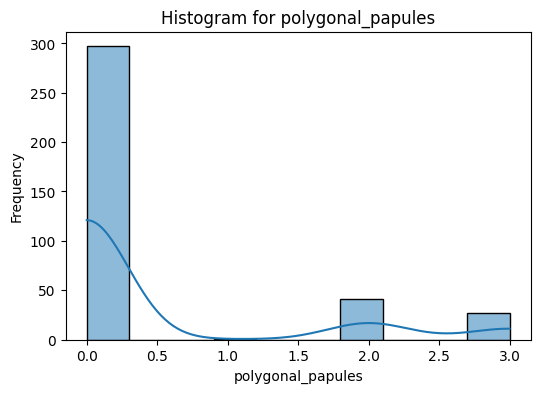

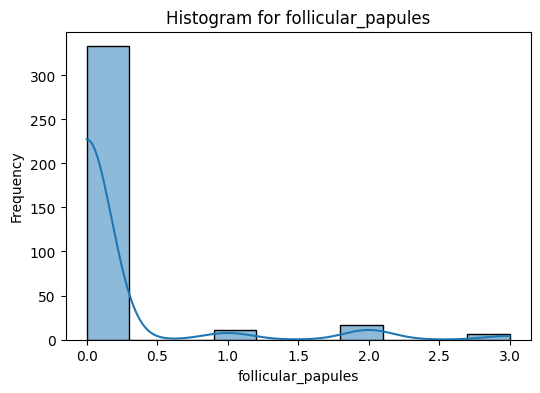

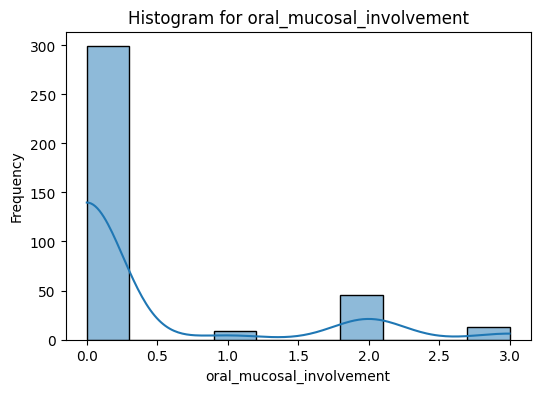

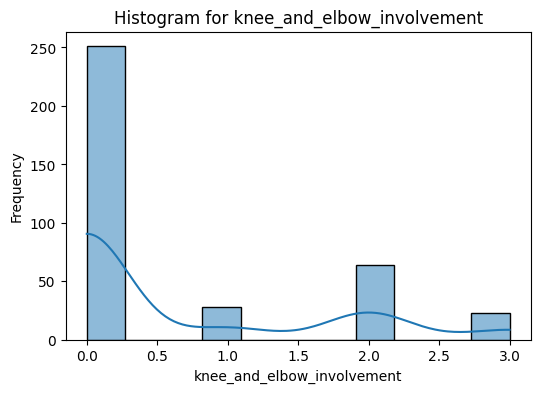

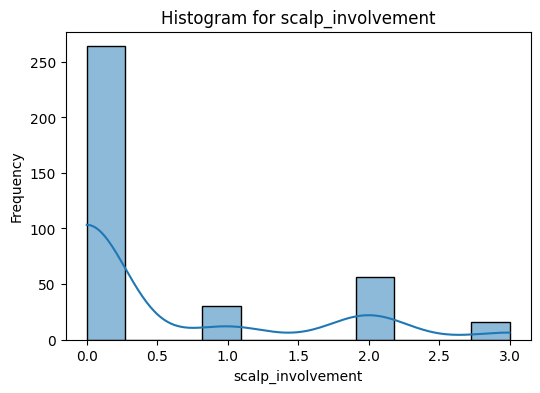

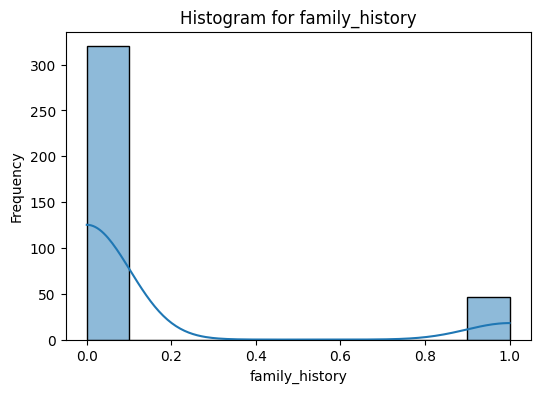

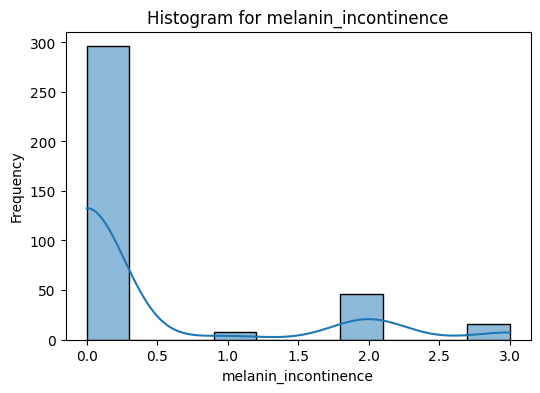

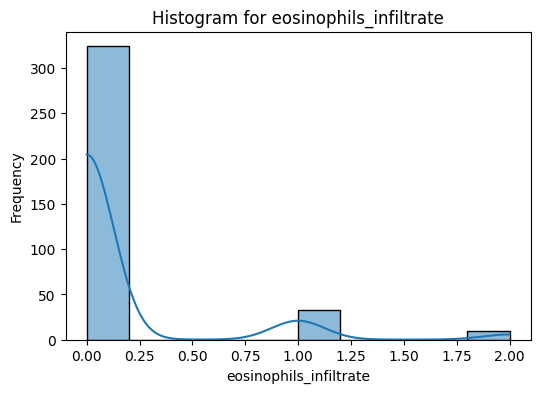

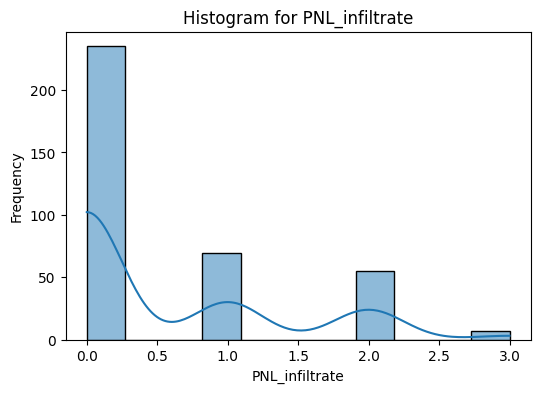

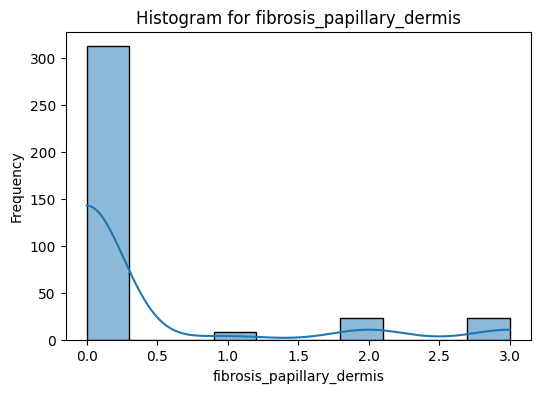

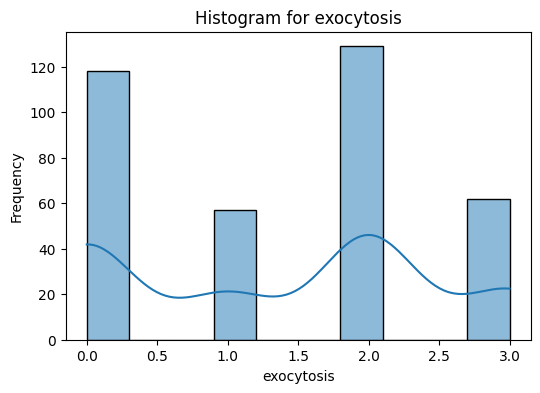

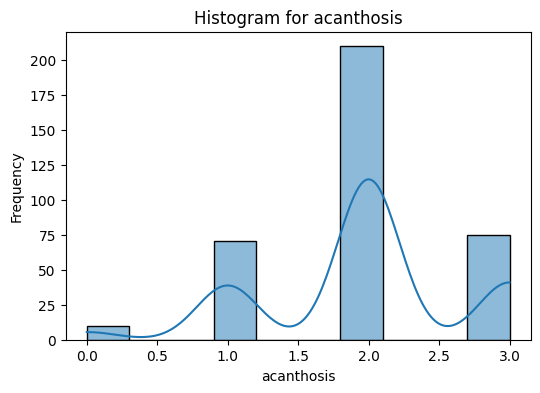

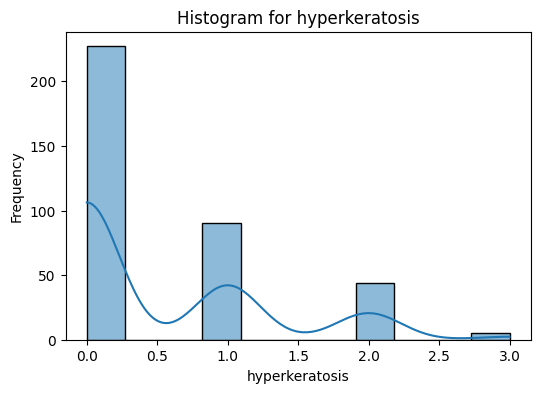

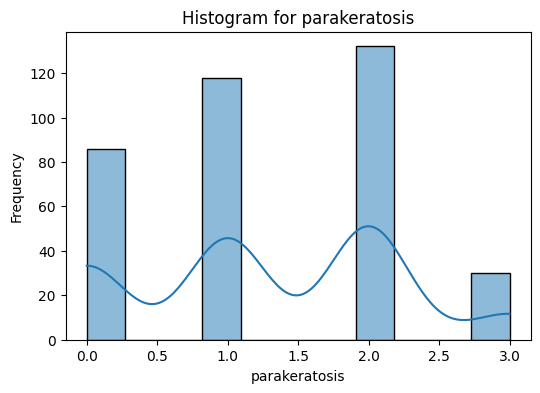

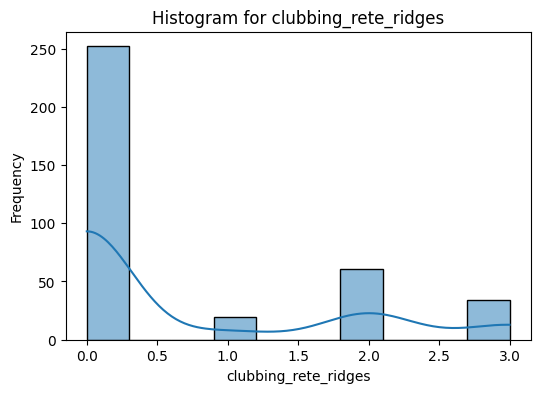

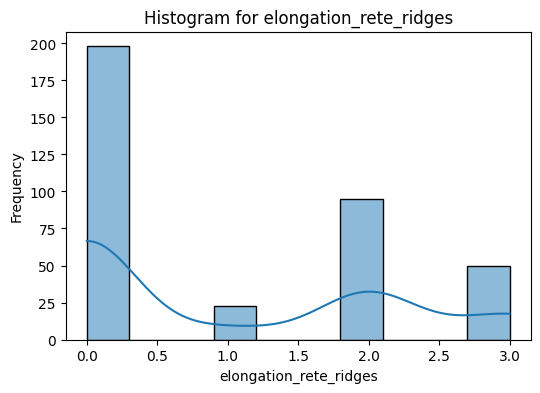

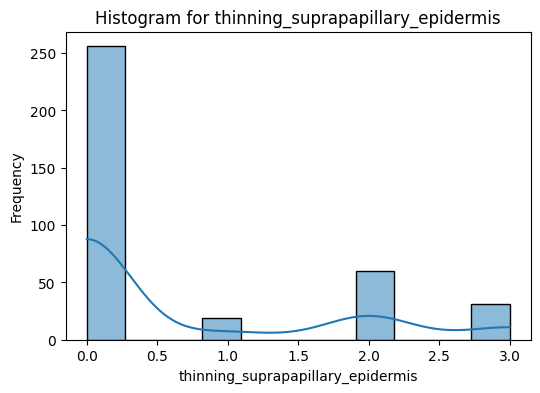

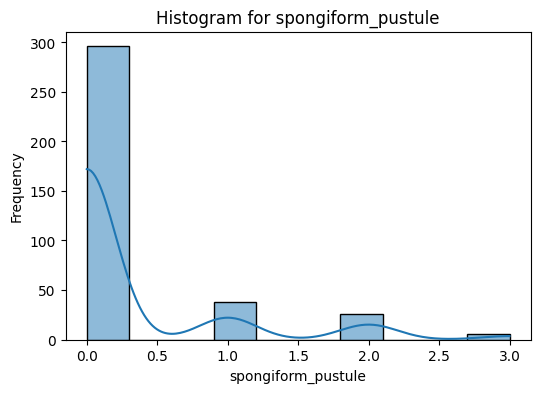

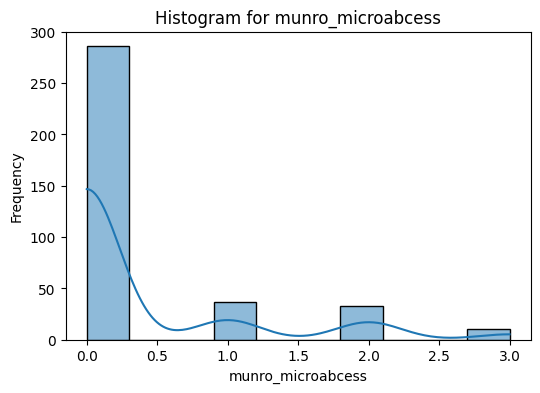

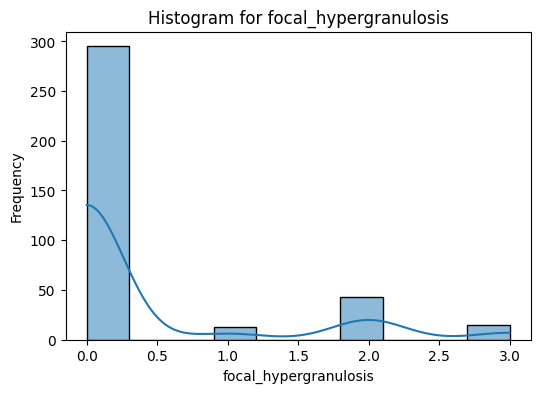

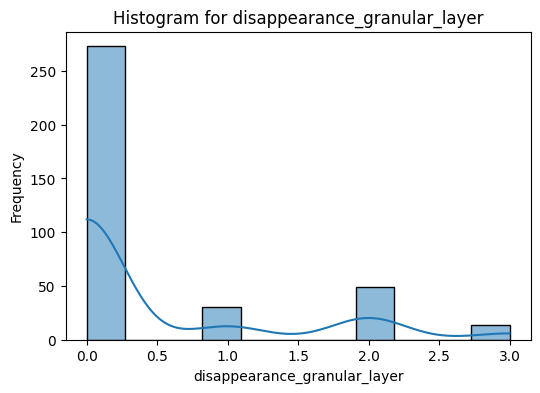

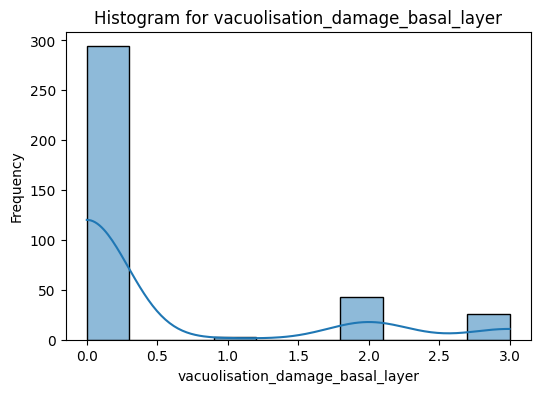

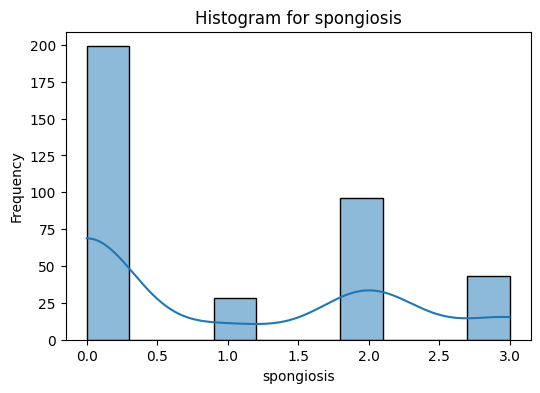

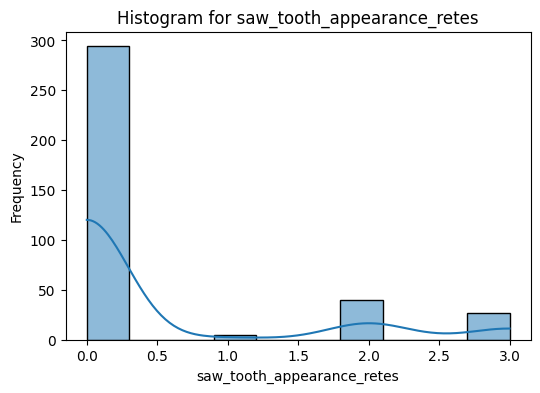

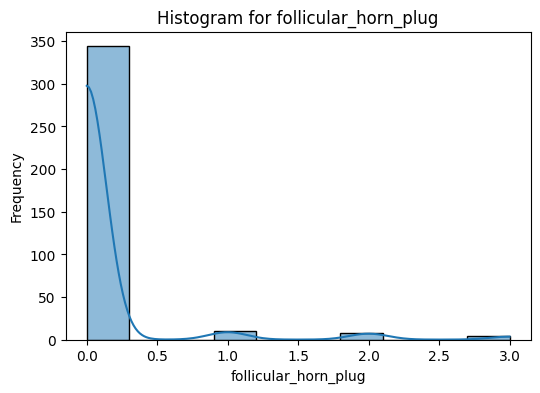

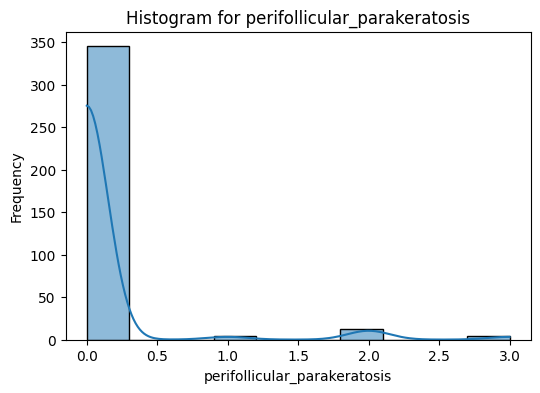

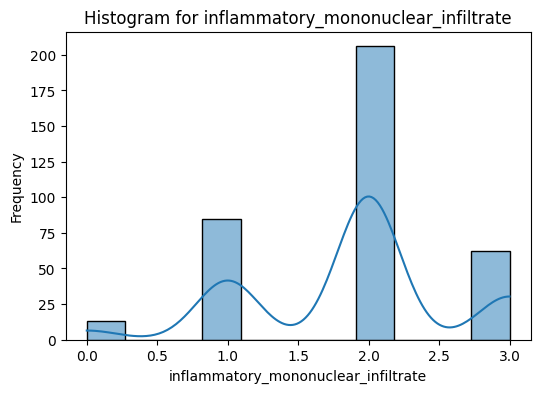

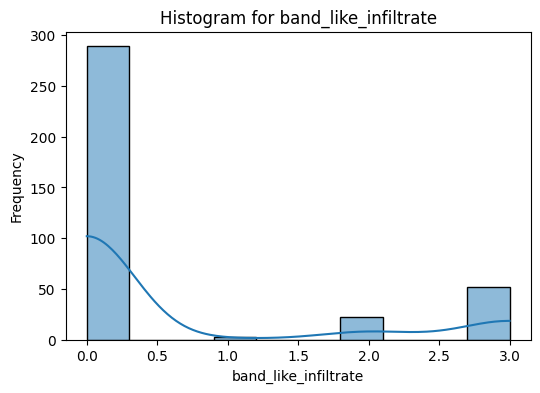

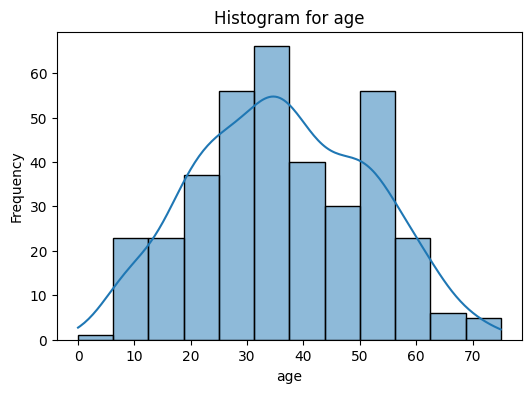

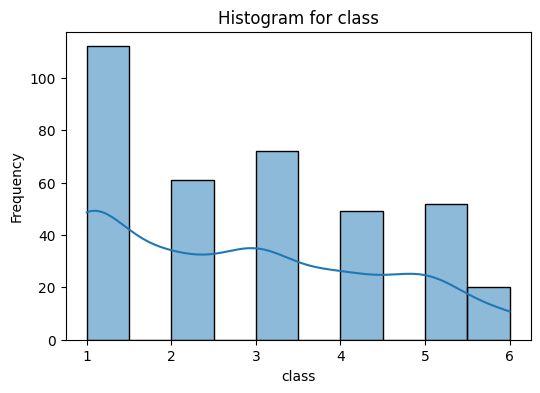

In [40]:
# Plot histograms
for col in data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

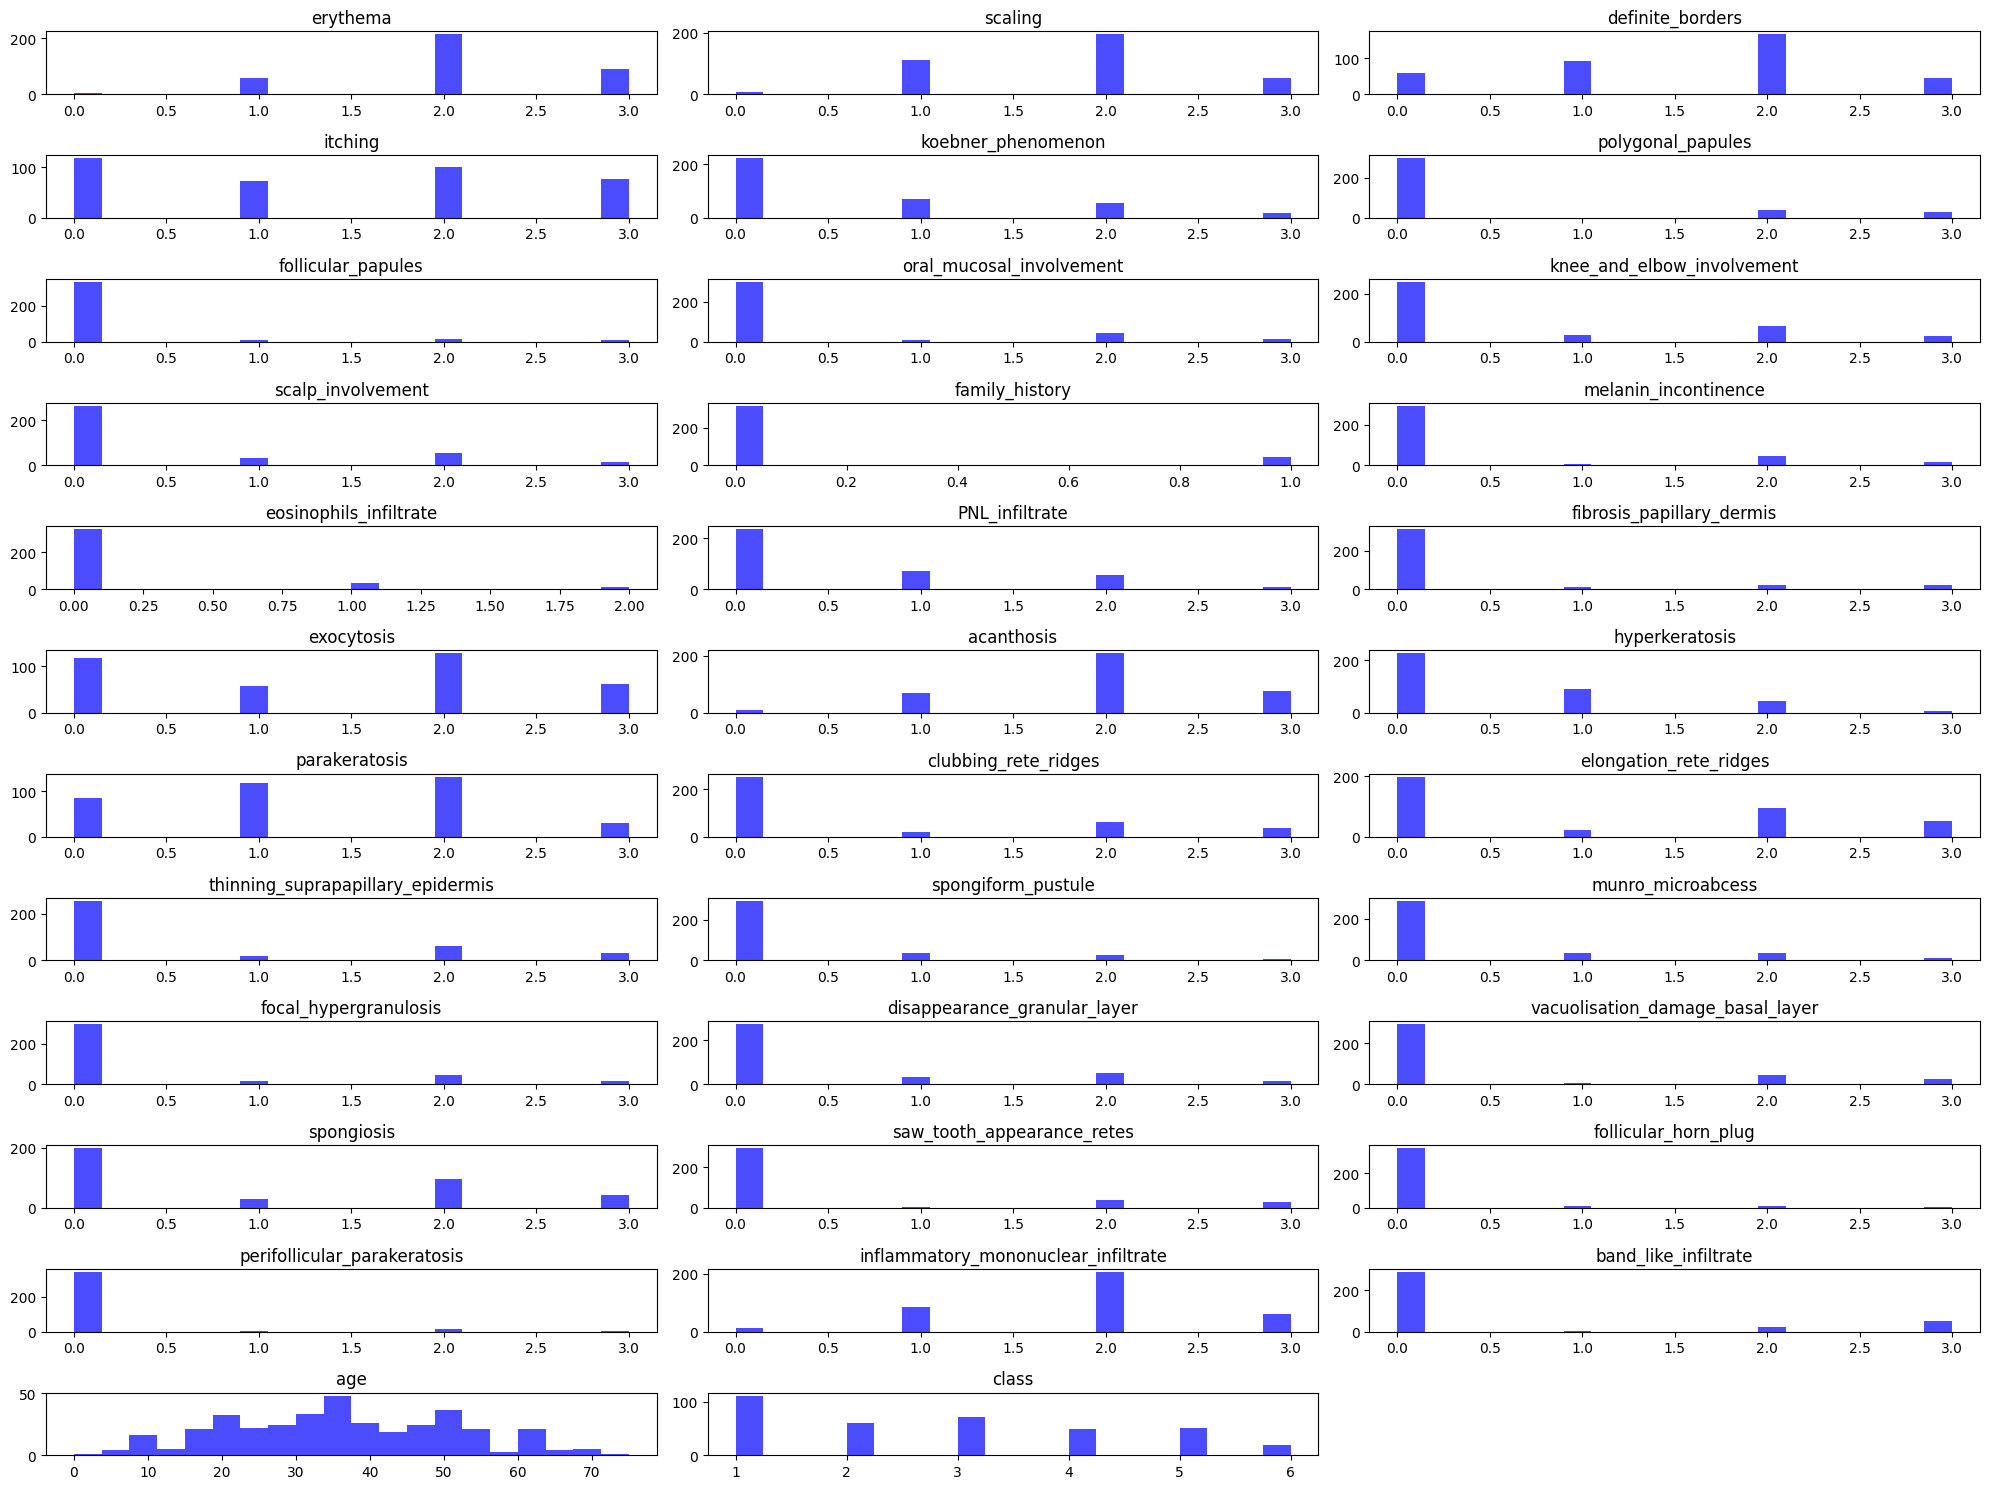

In [47]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns, 1):  # Get column names from the DataFrame 'data'
    plt.subplot((len(data.columns) + 2) // 3, 3, i)  # Also update len(columns)
    if pd.api.types.is_numeric_dtype(data[column]):
        plt.hist(data[column], bins=20, color='blue', alpha=0.7)
        plt.title(column)
    else:
        plt.text(0.5, 0.5, f"{column} is not numeric", fontsize=12, ha='center', va='center')
        plt.axis('off')

plt.tight_layout()
plt.show()

In [44]:
# For SVM Model
svm_report = classification_report(y_test, svm_preds)
print("SVM Classification Report:")
print(svm_report)

# For Random Forest Model
rf_report = classification_report(y_test, rf_preds)
print("Random Forest Classification Report:")
print(rf_report)

# After Outlier Removal
print("\nAfter Outlier Removal:")

# SVM
svm_clean_report = classification_report(y_test_clean, svm_preds_clean)
print("SVM Classification Report (Cleaned Data):")
print(svm_clean_report)

# Random Forest
rf_clean_report = classification_report(y_test_clean, rf_preds_clean)
print("Random Forest Classification Report (Cleaned Data):")
print(rf_clean_report)

SVM Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.97      0.95        31
           2       0.35      1.00      0.51         9
           3       1.00      1.00      1.00        13
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        10
           6       0.67      0.67      0.67         3

    accuracy                           0.73        74
   macro avg       0.49      0.61      0.52        74
weighted avg       0.64      0.73      0.66        74

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


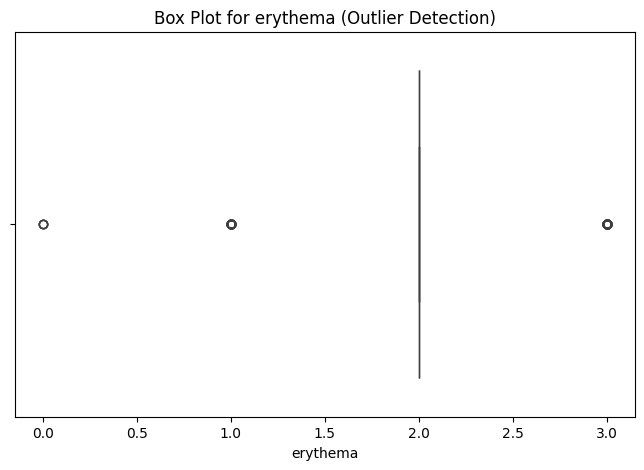

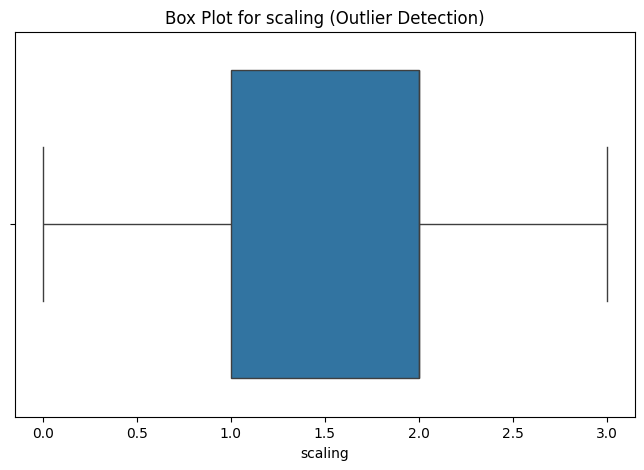

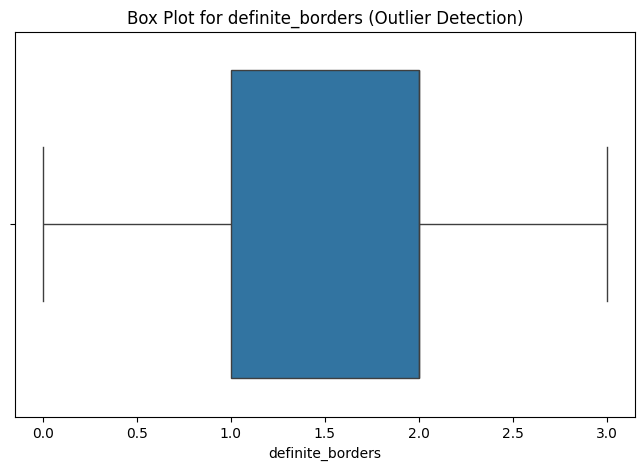

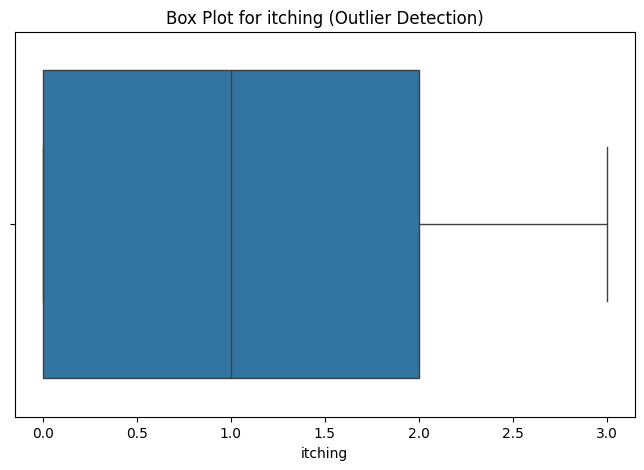

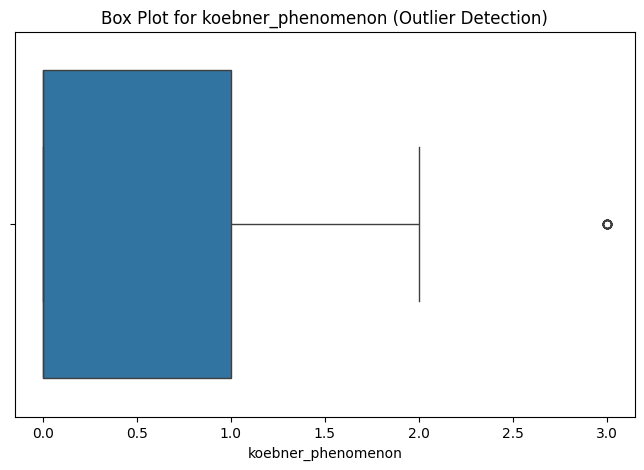

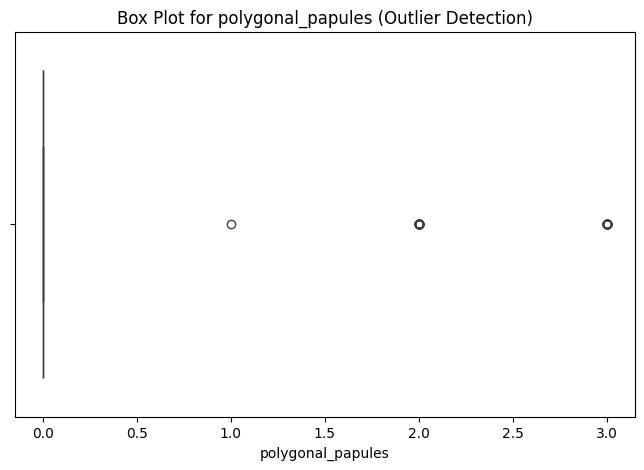

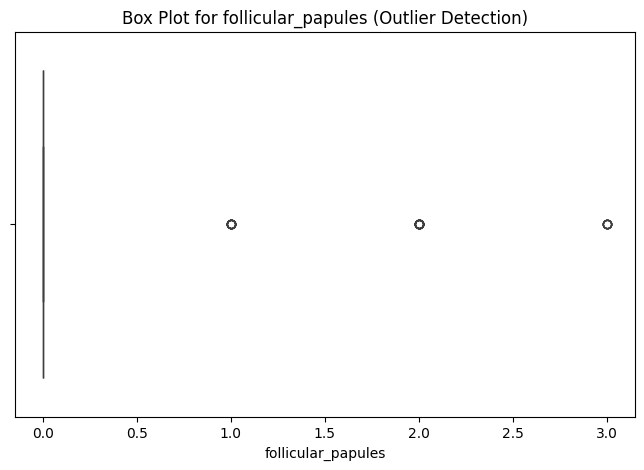

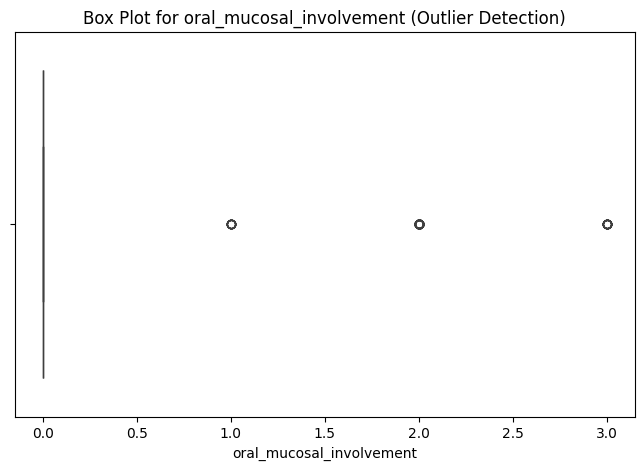

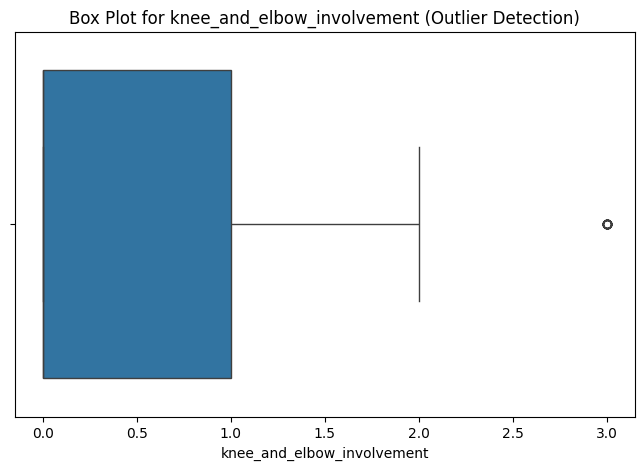

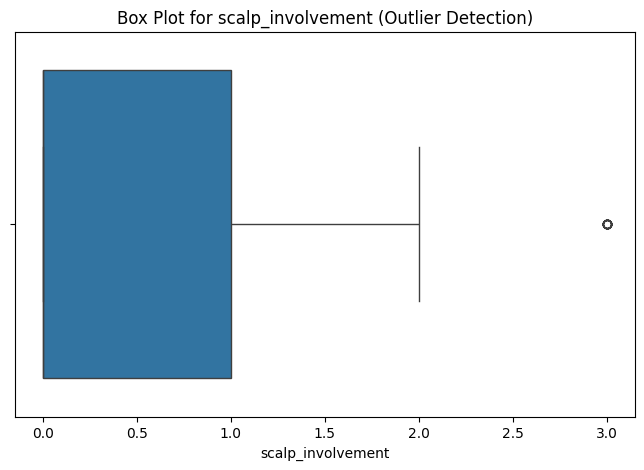

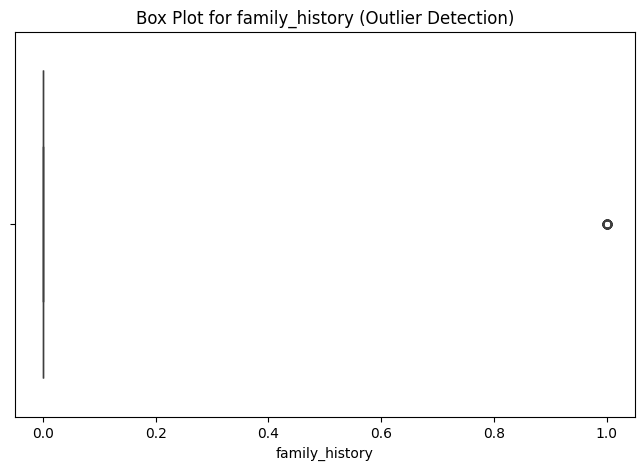

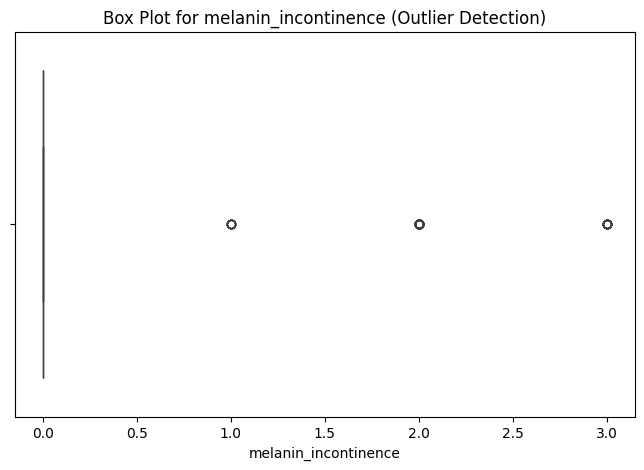

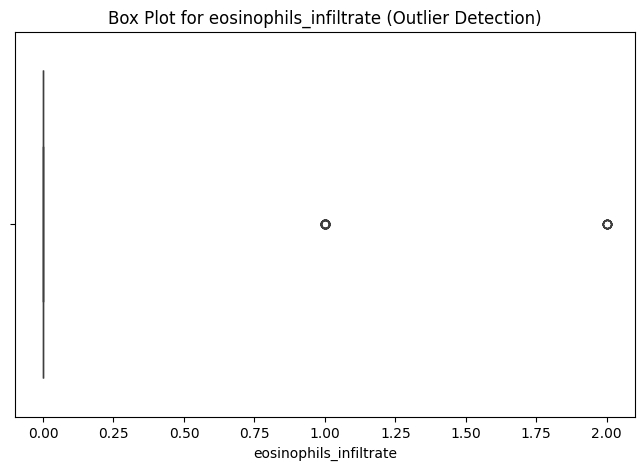

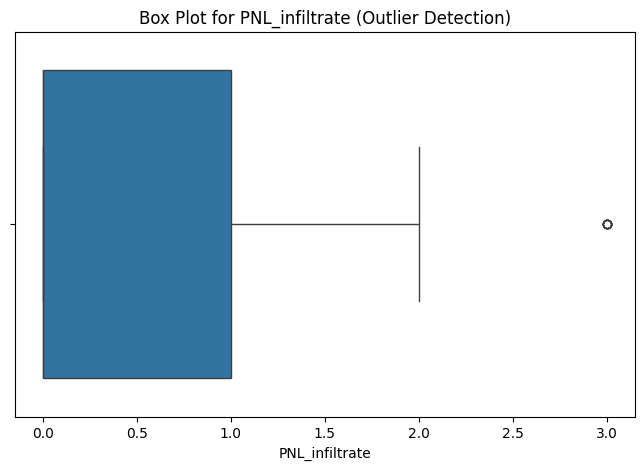

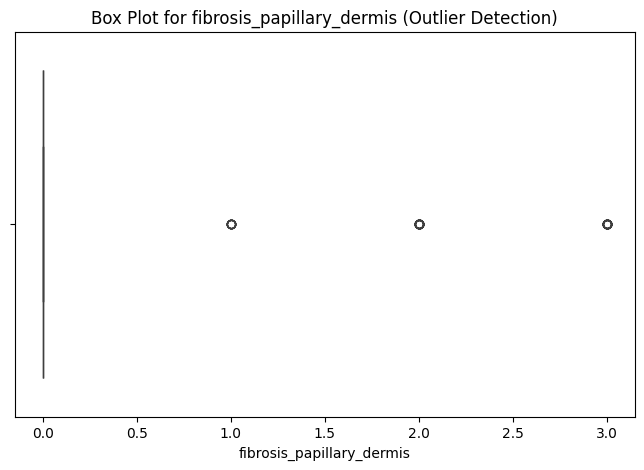

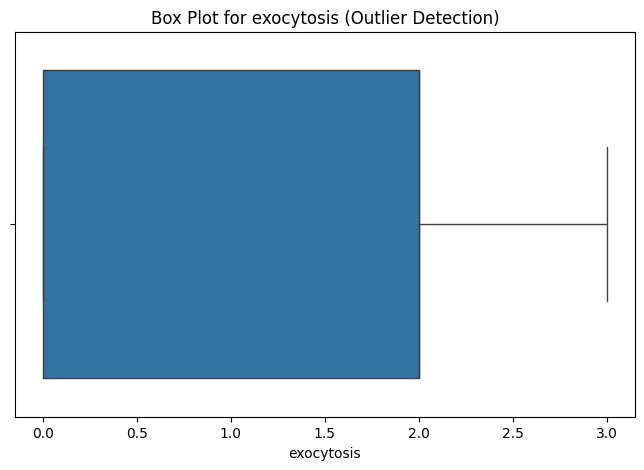

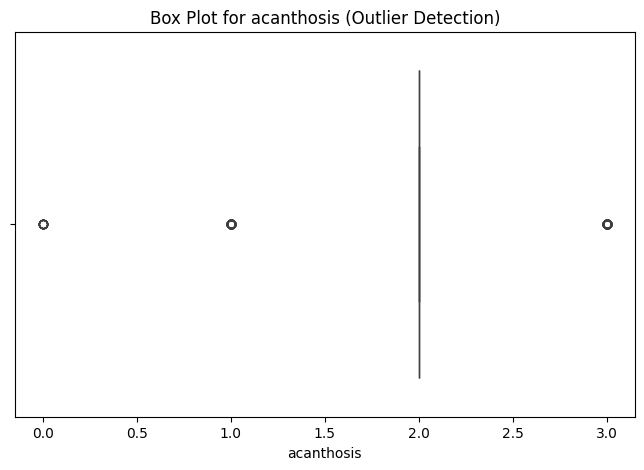

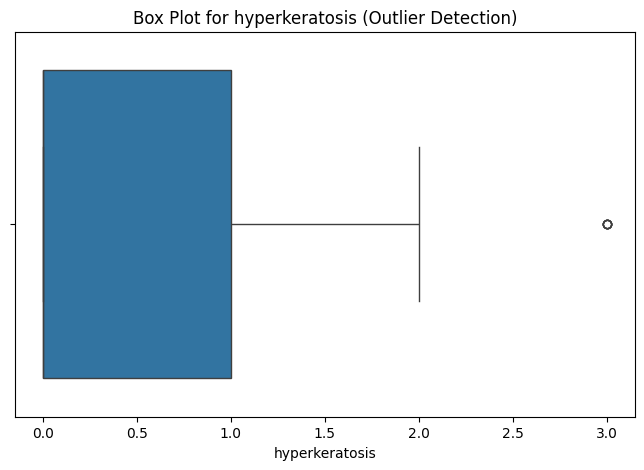

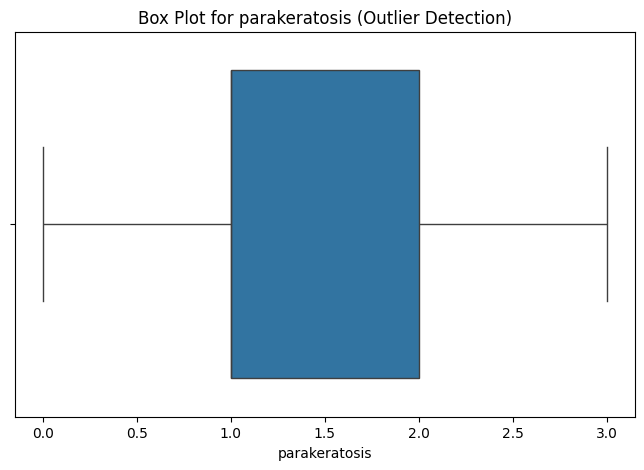

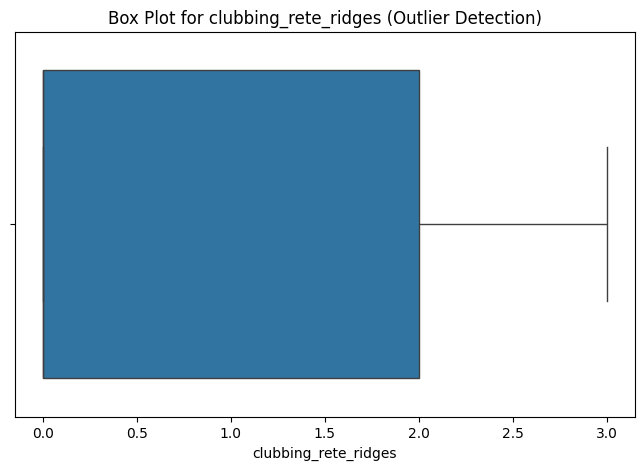

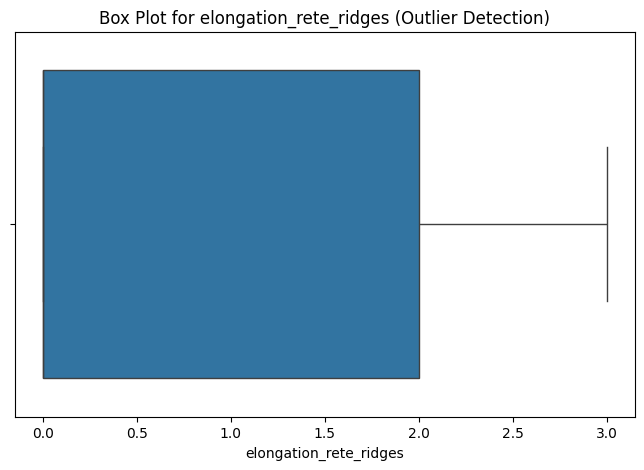

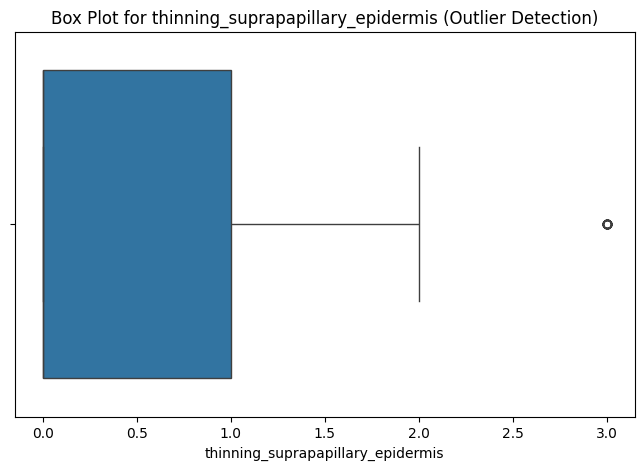

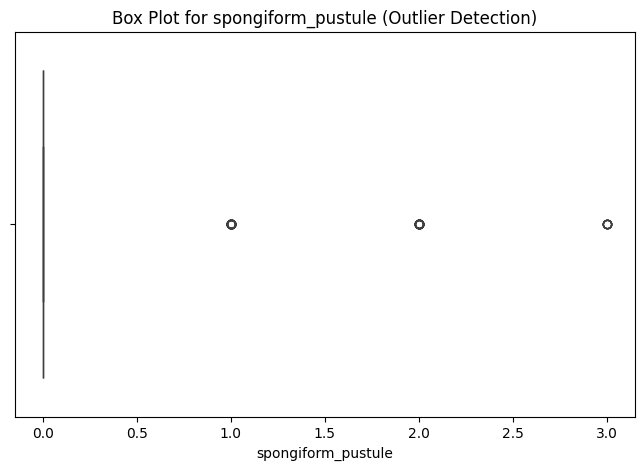

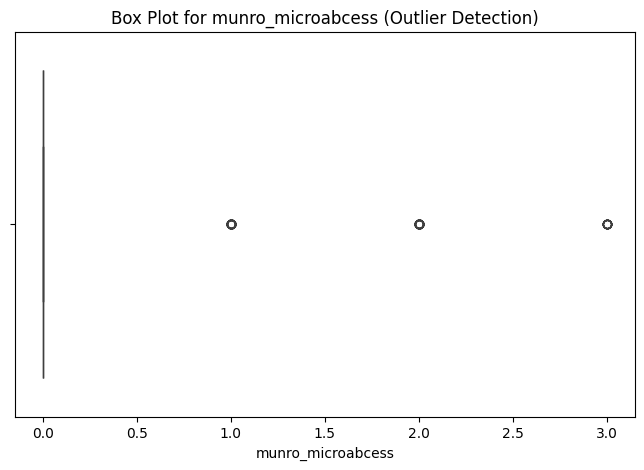

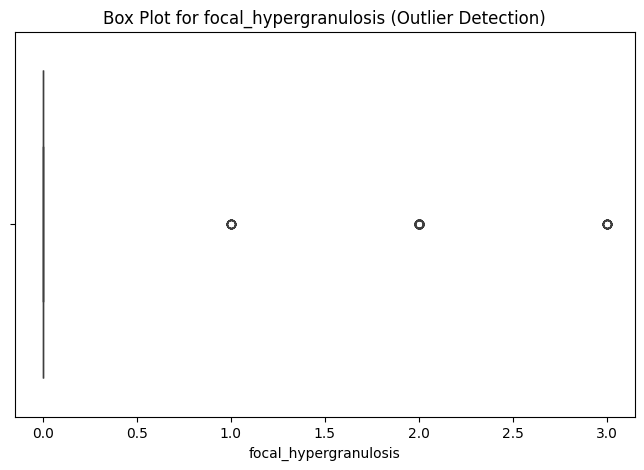

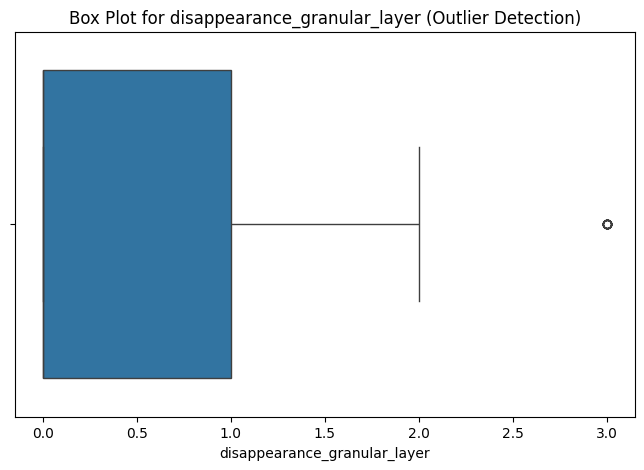

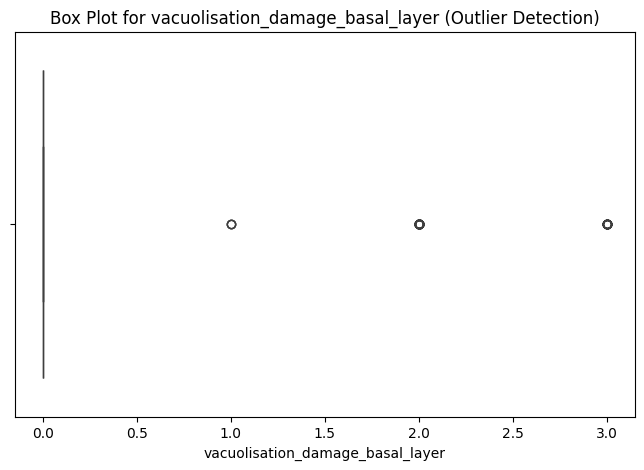

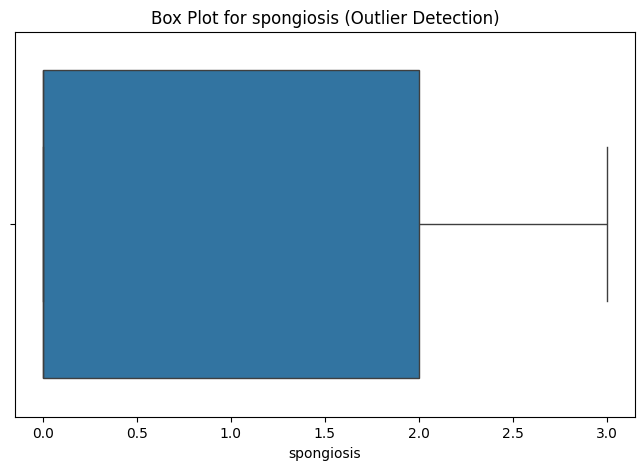

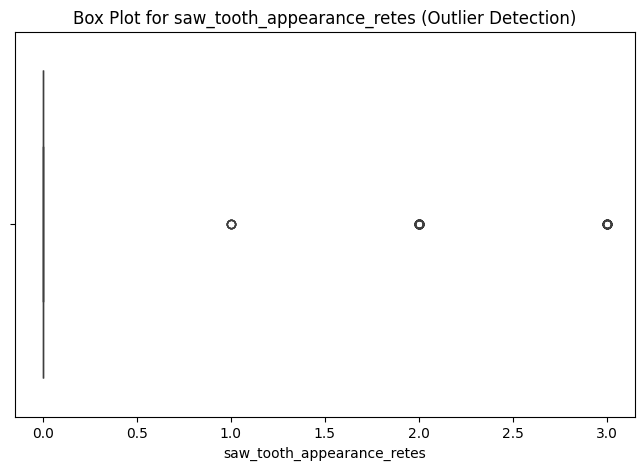

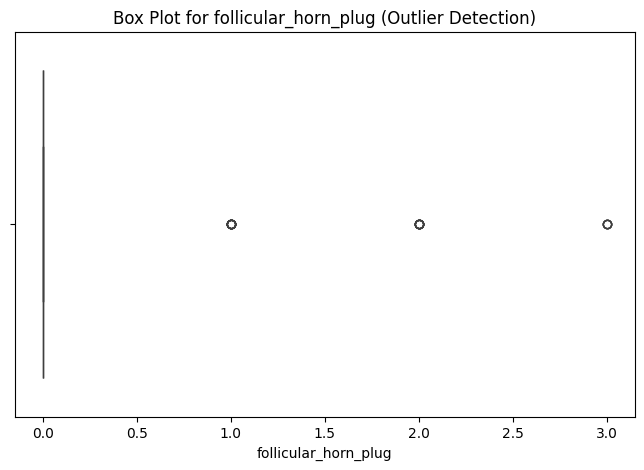

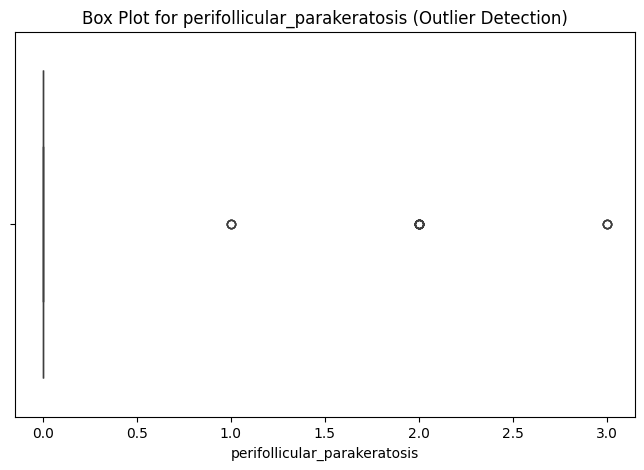

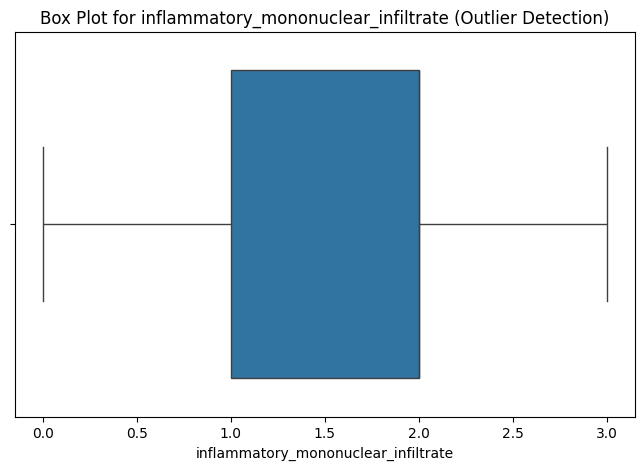

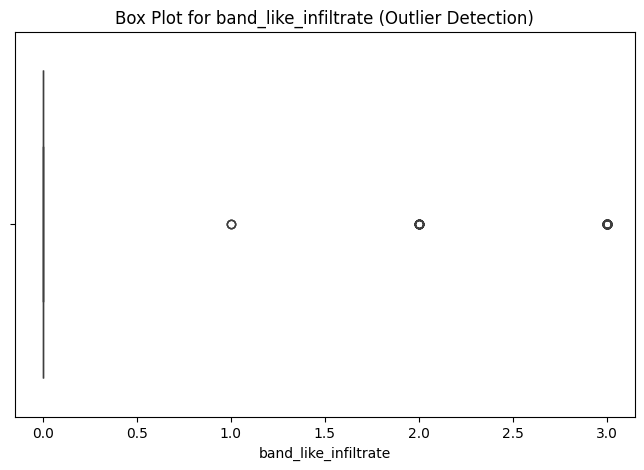

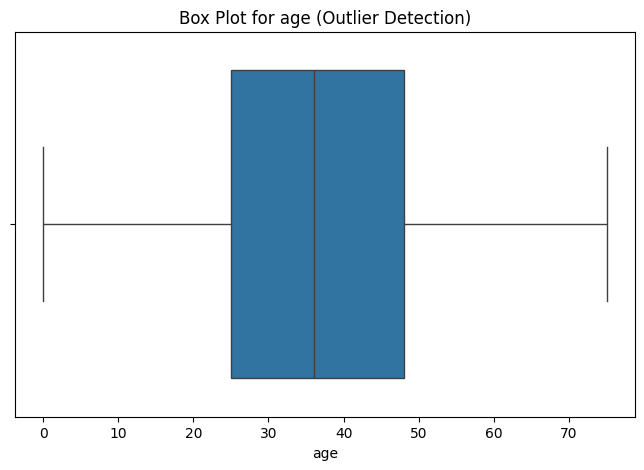

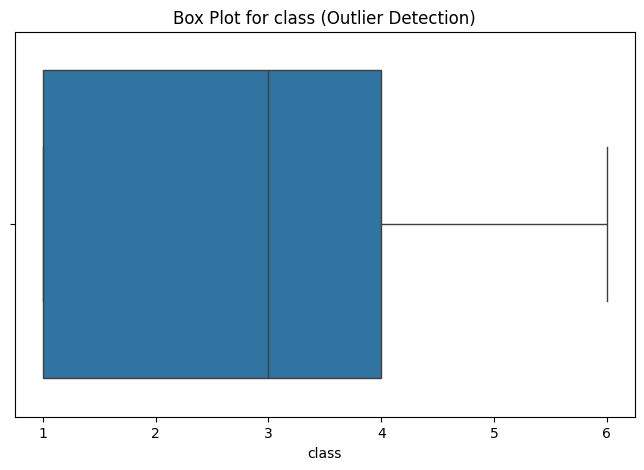

In [48]:
# Plot box plots for outliers
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:  # Only plot for numerical columns
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=data[col])
        plt.title(f'Box Plot for {col} (Outlier Detection)')
        plt.xlabel(col)
        plt.show()